In [2]:
# 利用 加利福尼亚房价数据集（California Housing Dataset）来进行房价预测
# 使用线性回归模型

# 导入必要的库
# train_test_split 是 scikit-learn 中用于将数据集划分为训练集和测试集的函数。
# fetch_california_housing 是 scikit-learn 提供的一个函数，用来加载加利福尼亚房价数据集。
# mean_squared_error 是 scikit-learn 中用于评估回归模型性能的函数，计算预测值和真实值之间的均方误差（MSE）。
# r2_score 是 scikit-learn 中用于评估回归模型性能的另一指标，称为决定系数（R²）
# R² 越接近 1，表示模型解释数据变异的能力越强；反之，越接近 0，表示模型无法很好地解释数据。

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [5]:
# 加载 数据集  并进行  模型训练与预测


# 1.加载数据集
housing = fetch_california_housing()

# 2.获取特征和目标值
X = housing.data
y = housing.target

# 3.数据集划分为 训练集 和 测试集
# 将数据集划分为训练集（80%）和测试集（20%）
# 这是一个随机种子，用于控制数据集划分的随机性。
# 设置 random_state=42（可以是任意整数）确保每次运行时数据集的划分是可重复的。
# 这样，你在调试或复现结果时，可以得到相同的训练集和测试集划分。
# 如果不设置 random_state，每次运行时划分可能会不同，导致模型评估结果不一致。
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=47)

# 特征缩放，进行标准化处理
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)


# 4.创建线性回归模型
model = LinearRegression()

# 5.训练模型
model.fit(X_train,y_train)

# 6.使用测试集进行预测
y_pred = model.predict(X_test)

# 7.计算模型的评估指标
# mse --> 均方误差  越小越好
# R^2 --> 决定系数  越接近 1 越好
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)



均方误差(MSE): 0.5217845663063297
R^2 决定系数: 0.6171425725212814


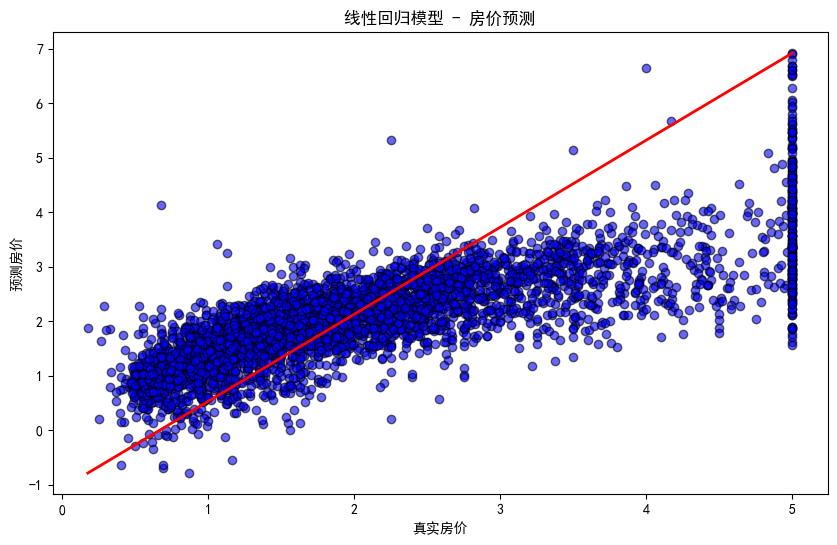

In [6]:
# 查看最后的结果

# 8.输出评估结果
# f-string 可以直接在字符串中使用 {} 来插入变量的值。这种方式比传统的字符串格式化（如使用 % 或 str.format()）更简单易读。
print(f"均方误差(MSE): {mse}")
print(f"R^2 决定系数: {r2}")

# 9.可视化预测结果与真实值

# 设置中文字体
plt.rcParams['font.family'] = 'SimHei'   # 使用黑体
plt.rcParams['axes.unicode_minus'] = False   # 解决负号 '-' 显示为方块的问题

# 创建一个新的图形窗口，设置图形的宽度为 10 英寸，高度为 6 英寸。
plt.figure(figsize=(10, 6))
# edgecolor='k'：散点的边缘颜色为黑色（'k' 表示黑色）。
plt.scatter(y_test,y_pred,color='blue',edgecolor='k',alpha=0.6)
# 这里绘制一个理想直线，y_pred = y_test，并查看散点是否落在该直线上
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], color = 'red', linewidth = 2)
plt.xlabel("真实房价")
plt.ylabel("预测房价")
plt.title("线性回归模型 - 房价预测")
plt.show()
